# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [71]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [72]:
from sklearn.impute import SimpleImputer



<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [78]:
years_of_data = df['YEAR'].nunique()
print(years_of_data)

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [81]:
print('Michigan')

Michigan


Find the average for your chosen test across all states in 2019

In [82]:
average_2019 = df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()
print(average_2019)

239.9433962264151


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [83]:
max_scores_per_state = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()
print(max_scores_per_state)

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [84]:
df['expenditure_per_student'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
df.sort_values(by=['STATE', 'YEAR'], inplace=True)
df['math_4_score_diff'] = df.groupby('STATE')['AVG_MATH_4_SCORE'].diff()
df['reading_4_score_diff'] = df.groupby('STATE')['AVG_READING_4_SCORE'].diff()

df['instructional_expenditure_proportion'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

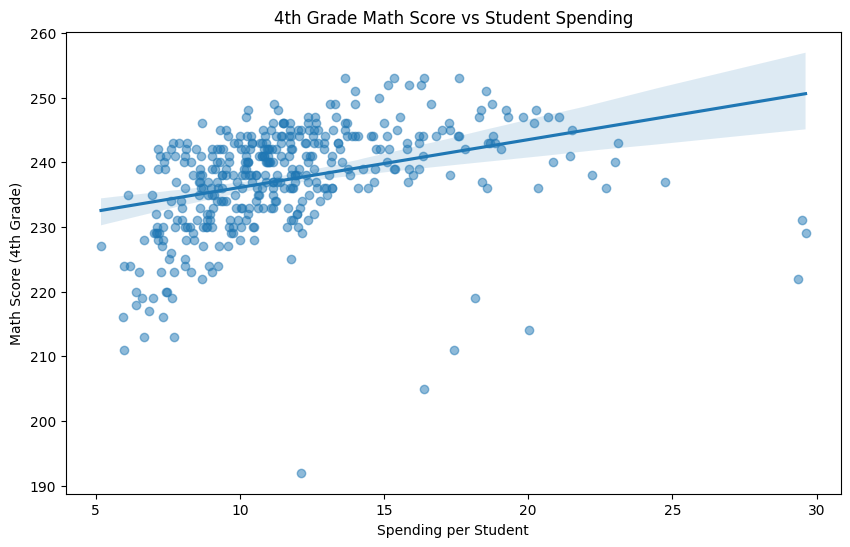

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x='expenditure_per_student', y='AVG_MATH_4_SCORE', data=df, scatter_kws={'alpha':0.5})
plt.title('4th Grade Math Score vs Student Spending')
plt.xlabel('Spending per Student')
plt.ylabel('Math Score (4th Grade)')

plt.show()


**<CAPTION FOR VIZ 1>**

**Visualization 2**

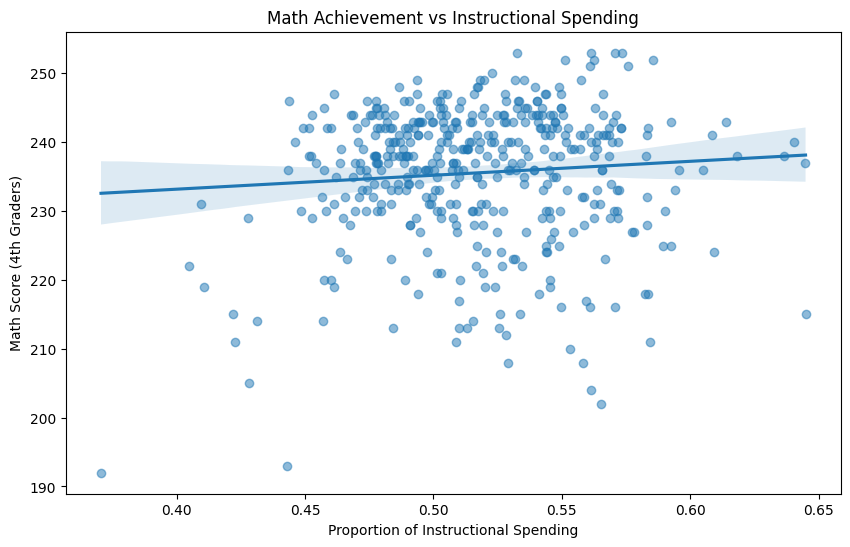

In [86]:
plt.figure(figsize=(10, 6))
sns.regplot(x='instructional_expenditure_proportion', y='AVG_MATH_4_SCORE', data=df, scatter_kws={'alpha':0.5})

plt.title('Math Achievement vs Instructional Spending')
plt.xlabel('Proportion of Instructional Spending')
plt.ylabel('Math Score (4th Graders)')

plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
numeric_imputer = SimpleImputer(strategy='median')
df_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)
df_imputed = pd.concat([df_numeric_imputed, df[categorical_cols]], axis=1)


X = df_imputed.drop(['AVG_MATH_4_SCORE', 'PRIMARY_KEY', 'STATE', 'YEAR'], axis=1) 
y = df_imputed['AVG_MATH_4_SCORE']


In [89]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [90]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [91]:
# create your model here
# model = 
model = LinearRegression()


In [92]:
model.fit(X_train, y_train)

LinearRegression()

In [94]:
y_pred = model.predict(X_test)
print(y_pred)

[237.14098293 238.10437521 237.09577641 237.07690683 238.87898953
 225.270811   238.95517847 238.8811547  237.18190497 236.87746235
 231.84022064 236.50745974 226.22202834 237.95059421 238.70699264
 236.59126213 241.72196969 240.40334723 237.29415885 237.88411525
 240.68703265 237.00359754 238.3257696  238.99092283 236.88670837
 231.46542451 243.07597425 247.9186639  245.41901247 238.03278659
 239.36114856 239.73868271 236.76188973 237.72081956 237.3887559
 238.63016836 236.77889644 239.18653243 236.78252685 237.24493228
 238.03843442 237.67582199 237.42848796 231.47807226 237.00668353
 238.81093318 233.69246788 241.36766619 237.31209746 236.07647499
 237.1113691  238.94548675 237.10964636 238.87010291 236.40603521
 237.93478048 237.78309682 196.87235179 245.58847811 237.10455121
 237.22177469 238.68280479 237.13932275 237.16849111 237.88315166
 238.74248055 236.97897274 221.13966101 237.11556148 234.76253439
 237.64907146 237.53921816 238.0554462  238.14113473 236.60292283
 238.848266

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
r2 = r2_score(y_test, y_pred)
print(r2)

2.9258245844668145
0.6794351797647561


/Users/daehwanyoo/project/2023-Tutorials/env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

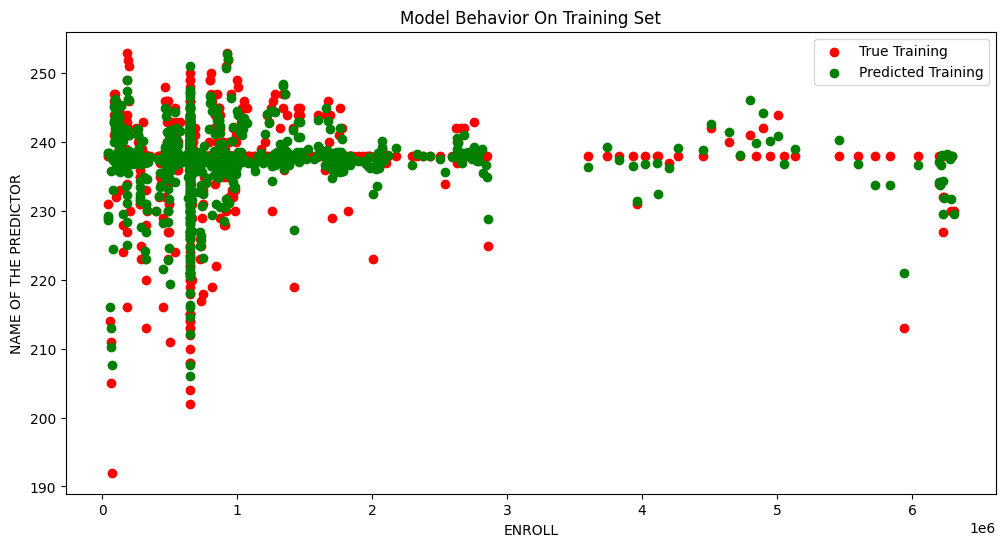

In [96]:
col_name = 'ENROLL'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

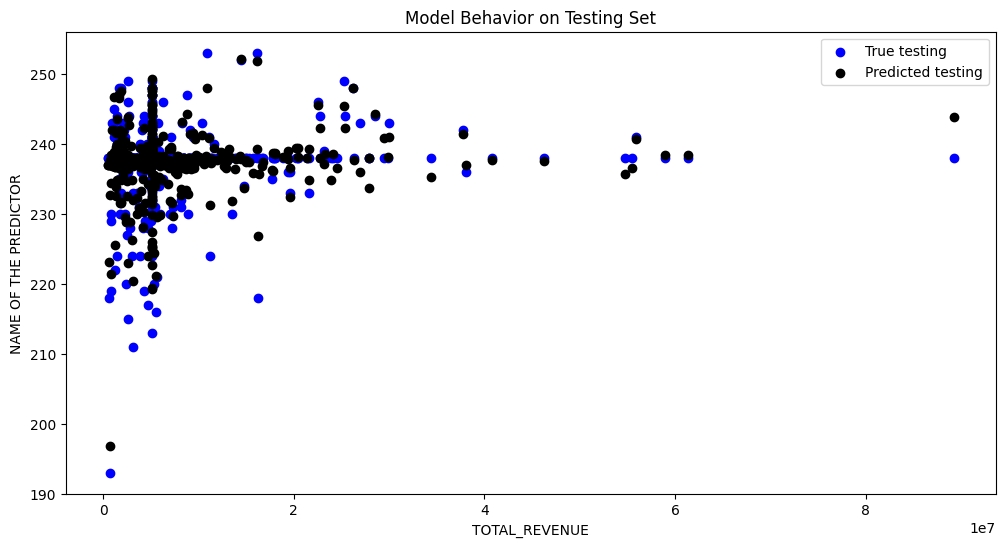

In [97]:
col_name = 'TOTAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In this project, I analyzed an educational dataset using Linear Regression, focusing on preprocessing, including handling missing values and resolving KeyError issues. I corrected the use of inappropriate classification metrics by employing regression metrics like MSE and R-squared, enhancing the model's evaluation. Finally, I resolved fitting issues, ensuring accurate model predictions. This work underscored the importance of proper data handling and the selection of appropriate evaluation metrics in predictive modeling.